<a href="https://colab.research.google.com/github/Fao0Vw/Labs/blob/main/KP20_DATASCIENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Курсовая работа по дисциплине "Анализ данных"

**Цель работы:**

Разработать регрессионную модель, обеспечивающую расчёт затрат на перекачку газа компрессорным цехом.

**Задание:**

Необходимо предложить регрессионную модель, обеспечивающую расчёт расхода ТГ (ЭЭ) на перекачку заданного объема транспортируемого газа при заданных значениях давления до и после компрессорного цеха, температуры газа на входе компрессорного цеха и количества включенных агрегатов. В пояснительной записке курсовой работы необходимо отразить следующие этапы работы:
1.	Предварительная обработка данных
2.	Анализ данных
3.	Расчёт регрессионной модели
4.	Анализ точности модели


#Подготовка данных

На этапе подготовки данных необходимо проконтролировать отсутствие пропусков в данных. Если пропуски есть, то необходимо от них избавиться. Необходимо предложить подход, обеспечивающий переход к единому временному интервалу для всех данных.

In [2]:
# Подключение библиотек
import pandas as pd 
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Импорт данных из файлов:

Таблица с давлением перед компрессорным цехом и после него :

In [ ]:
# 2014
p14=pd.read_excel('/content/drive/MyDrive/MyPython/20/2014/Pвх, Pвых.xlsx', header=None)
p14=p14.dropna()
p14=p14.drop(index=[4384,4385, 4386], columns=2 )
p14.columns=['Дата', 'Р входа', 'Р выхода']


# 2015
p15=pd.read_excel('/content/drive/MyDrive/MyPython/20/2015/Pвх, Pвых.xlsx', header=None)
p15=p15.dropna()
p15=p15.drop(index=[4384,4385, 4386], columns=2 )
p15.columns=['Дата', 'Р входа', 'Р выхода']



# 2016
p16=pd.read_excel('/content/drive/MyDrive/MyPython/20/2016/Pвх, Pвых.xlsx', header=None)
p16=p16.dropna()
p16=p16.drop(index=[4396,4397, 4398],columns=2 )
p16.columns=['Дата', 'Р входа', 'Р выхода']

# Все данные за 3 года:
pl=p14.append(p15, sort=False)
pl=pl.append(p16, sort=False)

pl=pl.reset_index(drop=True)

Таблица с расходом транспортируемого газа:

In [ ]:
# Таблица с расходом транспортируемого газа
# 2014
ras4=pd.read_excel('/content/drive/MyDrive/MyPython/20/2014/Q перекач.xlsx', header=None)
ras4=ras4.dropna()
ras4=ras4.drop(index=[8])
ras4.columns=['Дата', 'Расход Q', 'Единицы изм']
ras4 = ras4.astype({'Дата': np.datetime64})
ras4= ras4.sort_values('Дата')


# 2015
ras5=pd.read_excel('/content/drive/MyDrive/MyPython/20/2015/Q перекач.xlsx', header=None)
ras5=ras5.dropna()
ras5=ras5.drop(index=[8])
ras5.columns=['Дата', 'Расход Q', 'Единицы изм']
ras5 = ras5.astype({'Дата': np.datetime64})
ras5= ras5.sort_values('Дата')


# 2016
ras6=pd.read_excel('/content/drive/MyDrive/MyPython/20/2016/Q перекач.xlsx', header=None)
ras6=ras6.dropna()
ras6=ras6.drop(index=[8])
ras6.columns=['Дата', 'Расход Q', 'Единицы изм']
ras6 = ras6.astype({'Дата': np.datetime64})
ras6= ras6.sort_values('Дата')


# Все данные за 3 года:
ras=ras4.append(ras5, sort=False)
ras=ras.append(ras6, sort=False)
ras=ras.reset_index(drop=True)

Таблица с расходом топливного газа (компрессорный цех оснащен газотурбинным двигателем):

In [ ]:
# Таблица с расходом топливного газа (компрессорный цех оснащен газотурбинным двигателем)
# 2014
tg4=pd.read_excel('/content/drive/MyDrive/MyPython/20/2014/Q тг.xlsx', header=None)
tg4=tg4.dropna()
tg4=tg4.drop(index=[369,370,371])
tg4.columns=['Дата', 'Расход ТГ']



# 2015
tg5=pd.read_excel('/content/drive/MyDrive/MyPython/20/2015/Q тг.xlsx', header=None)
tg5=tg5.dropna()
tg5=tg5.drop(index=[370,371,372])
tg5.columns=['Дата', 'Расход ТГ']


# 2016
tg6=pd.read_excel('/content/drive/MyDrive/MyPython/20/2016/Q тг.xlsx', header=None)
tg6=tg6.dropna()
tg6=tg6.drop(index=[370,371,372])
tg6.columns=['Дата', 'Расход ТГ']



# Все данные за 3 года:
tg=tg4.append(tg5, sort=False)
tg=tg.append(tg6, sort=False)
tg=tg.reset_index(drop=True)

Таблица с температурой газа на входе в компрессорный цех, на выход из него и после системы охлаждения:

In [ ]:
# Таблица с температурой газа на входе в компрессорный цех, на выход из него и после системы охлаждения
# 2014
temp4=pd.read_excel('/content/drive/MyDrive/MyPython/20/2014/Твх, Твых.xlsx', header=None)
temp4=temp4.dropna()
temp4=temp4.drop(index=[4384,4385,4386], columns=[2,4])
temp4.columns=['Дата', 'Т вход', 'Т выход','Т после АВО']
temp4 = temp4.astype({'Дата': np.datetime64})
temp4= temp4.sort_values('Дата')

# 2015
temp5=pd.read_excel('/content/drive/MyDrive/MyPython/20/2015/Tвх, Tвых.xlsx', header=None)
temp5=temp5.dropna()
temp5=temp5.drop(index=[4384,4385,4386], columns=[2,4])
temp5.columns=['Дата', 'Т вход', 'Т выход','Т после АВО']
temp5 = temp5.astype({'Дата': np.datetime64})
temp5= temp5.sort_values('Дата')

# 2016
temp6=pd.read_excel('/content/drive/MyDrive/MyPython/20/2016/Твх, Tвых.xlsx', header=None)
temp6=temp6.dropna()
temp6=temp6.drop(index=[4396,4397,4398], columns=[2,4])
temp6.columns=['Дата', 'Т вход', 'Т выход','Т после АВО']
temp6 = temp6.astype({'Дата': np.datetime64})
temp6= temp6.sort_values('Дата')


# Все данные за 3 года:
temp=temp4.append(temp5, sort=False)
temp=temp.append(temp6, sort=False)
temp=temp.reset_index(drop=True)

Таблица с количеством работающих газоперекачивающих агрегатов компрессорного цеха (ГПА КЦ):

In [ ]:
# Таблица с количеством работающих газоперекачивающих агрегатов компрессорного цеха (ГПА КЦ)
# 2014
gpa4=pd.read_excel('/content/drive/MyDrive/MyPython/20/2014/Кол-во ГПА.xlsx', header=None)
gpa4=gpa4.dropna()
gpa4=gpa4.drop(index=[4384,4385,4386], columns=[2,4])
gpa4.columns=['Дата', 'ГПА в работе', 'ГПА в резерве','ГПА в ремонте']
gpa4 = gpa4.astype({'Дата': np.datetime64})
gpa4= gpa4.sort_values('Дата')



# 2015
gpa5=pd.read_excel('/content/drive/MyDrive/MyPython/20/2015/Кол-во ГПА.xlsx', header=None)
gpa5=gpa5.dropna()
gpa5=gpa5.drop(index=[4384,4385,4386], columns=[2,4])
gpa5.columns=['Дата', 'ГПА в работе', 'ГПА в резерве','ГПА в ремонте']
gpa5 = gpa5.astype({'Дата': np.datetime64})
gpa5= gpa5.sort_values('Дата')


# 2016
gpa6=pd.read_excel('/content/drive/MyDrive/MyPython/20/2016/Кол-во ГПА.xlsx', header=None)
gpa6=gpa6.dropna()
gpa6=gpa6.drop(index=[4396,4397,4398], columns=[2,4])
gpa6.columns=['Дата', 'ГПА в работе', 'ГПА в резерве','ГПА в ремонте']
gpa6 = gpa6.astype({'Дата': np.datetime64})
gpa6= gpa6.sort_values('Дата')

# Все данные за 3 года:
gpa=gpa4.append(gpa5, sort=False)
gpa=gpa.append(gpa6, sort=False)
gpa=gpa.reset_index(drop=True)

Все данные в одной таблице: (Кроме расхода топливного газа (ТГ) на перекачку), т.к. столбец этого параметра имеет другой формат времени и нам необходимо привести его к формату остальных параметров 

In [8]:
ras= ras.drop(labels = ['Дата'], axis = 1)
ras=ras.drop(labels = ['Единицы изм'], axis = 1)
temp=temp.drop(labels = ['Дата'], axis = 1)
gpa=gpa.drop(labels = ['Дата'], axis = 1)
data=pd.concat([ras,pl, temp, gpa], axis=1)
data


,Расход Q,Дата,Р входа,Р выхода,Т вход,Т выход,Т после АВО,ГПА в работе,ГПА в резерве,ГПА в ремонте
0,2800.1,2014-01-01 00:00:00,52.0,70.6,21.0,50.0,30.0,3.0,5.0,0.0
1,2800.2,2014-01-01 02:00:00,52.6,70.6,21.0,50.0,30.0,3.0,5.0,0.0
2,2794.5,2014-01-01 04:00:00,53.0,70.7,21.0,50.0,30.0,3.0,5.0,0.0
3,2807.7,2014-01-01 06:00:00,53.5,71.0,21.0,50.0,30.0,3.0,5.0,0.0
4,2815.7,2014-01-01 08:00:00,53.7,71.3,22.0,49.0,30.0,3.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...
13147,3190.5,2016-12-31 14:00:00,51.7,70.5,19.6,48.0,27.0,3.0,5.0,0.0
13148,3220.4,2016-12-31 16:00:00,51.5,70.3,19.4,47.8,27.0,3.0,5.0,0.0
13149,3164.1,2016-12-31 18:00:00,51.4,70.1,18.7,47.5,27.0,3.0,5.0,0.0
13150,3179.4,2016-12-31 20:00:00,51.2,69.8,18.9,47.5,27.0,3.0,5.0,0.0


In [9]:
df=data.drop(['ГПА в резерве', 'ГПА в ремонте'], axis=1)
df

,Расход Q,Дата,Р входа,Р выхода,Т вход,Т выход,Т после АВО,ГПА в работе
0,2800.1,2014-01-01 00:00:00,52.0,70.6,21.0,50.0,30.0,3.0
1,2800.2,2014-01-01 02:00:00,52.6,70.6,21.0,50.0,30.0,3.0
2,2794.5,2014-01-01 04:00:00,53.0,70.7,21.0,50.0,30.0,3.0
3,2807.7,2014-01-01 06:00:00,53.5,71.0,21.0,50.0,30.0,3.0
4,2815.7,2014-01-01 08:00:00,53.7,71.3,22.0,49.0,30.0,3.0
...,...,...,...,...,...,...,...,...
13147,3190.5,2016-12-31 14:00:00,51.7,70.5,19.6,48.0,27.0,3.0
13148,3220.4,2016-12-31 16:00:00,51.5,70.3,19.4,47.8,27.0,3.0
13149,3164.1,2016-12-31 18:00:00,51.4,70.1,18.7,47.5,27.0,3.0
13150,3179.4,2016-12-31 20:00:00,51.2,69.8,18.9,47.5,27.0,3.0


Меняем местами столбцы:

In [10]:
df = df.reindex(columns=['Дата','Расход Q', 'Р входа', 'Р выхода', 'Т вход', 'Т выход','Т после АВО',	'ГПА в работе'])
df

,Дата,Расход Q,Р входа,Р выхода,Т вход,Т выход,Т после АВО,ГПА в работе
0,2014-01-01 00:00:00,2800.1,52.0,70.6,21.0,50.0,30.0,3.0
1,2014-01-01 02:00:00,2800.2,52.6,70.6,21.0,50.0,30.0,3.0
2,2014-01-01 04:00:00,2794.5,53.0,70.7,21.0,50.0,30.0,3.0
3,2014-01-01 06:00:00,2807.7,53.5,71.0,21.0,50.0,30.0,3.0
4,2014-01-01 08:00:00,2815.7,53.7,71.3,22.0,49.0,30.0,3.0
...,...,...,...,...,...,...,...,...
13147,2016-12-31 14:00:00,3190.5,51.7,70.5,19.6,48.0,27.0,3.0
13148,2016-12-31 16:00:00,3220.4,51.5,70.3,19.4,47.8,27.0,3.0
13149,2016-12-31 18:00:00,3164.1,51.4,70.1,18.7,47.5,27.0,3.0
13150,2016-12-31 20:00:00,3179.4,51.2,69.8,18.9,47.5,27.0,3.0


#Добавляем в таблицу "Расход ТГ"

Для правильного подсчета кол-ва времени для расхода ТГ, в новый массив df1 запишем те строки, когда компрессионный цех работал:

In [111]:
df1=df[(df['ГПА в работе'] > 0)]
df1=df1.reset_index(drop=True)
df1

,Дата,Расход Q,Р входа,Р выхода,Т вход,Т выход,ГПА в работе,Расход ТГ
0,2014-01-01 00:00:00,2800.1,52.0,70.6,21.0,50.0,3.0,21.833333
1,2014-01-01 02:00:00,2800.2,52.6,70.6,21.0,50.0,3.0,21.833333
2,2014-01-01 04:00:00,2794.5,53.0,70.7,21.0,50.0,3.0,21.833333
3,2014-01-01 06:00:00,2807.7,53.5,71.0,21.0,50.0,3.0,21.833333
4,2014-01-01 08:00:00,2815.7,53.7,71.3,22.0,49.0,3.0,21.833333
...,...,...,...,...,...,...,...,...
10438,2016-12-31 14:00:00,3190.5,51.7,70.5,19.6,48.0,3.0,22.333333
10439,2016-12-31 16:00:00,3220.4,51.5,70.3,19.4,47.8,3.0,22.333333
10440,2016-12-31 18:00:00,3164.1,51.4,70.1,18.7,47.5,3.0,22.333333
10441,2016-12-31 20:00:00,3179.4,51.2,69.8,18.9,47.5,3.0,22.333333


Разделяем столбец даты и времени на два разных столбца

In [112]:
df1 = df1.astype({'Дата': np.datetime64})  #Преобразуем столбец дата в нужный тип данных
df1['Время'] = df1['Дата'].dt.time
df1['Дата'] = df1['Дата'].dt.date

In [115]:
df1

,Дата,Время,Расход Q,Р входа,Р выхода,Т вход,Т выход,Т после АВО,ГПА в работе
0,2014-01-01,00:00:00,2800.1,52.0,70.6,21.0,50.0,NaN,3.0
1,2014-01-01,02:00:00,2800.2,52.6,70.6,21.0,50.0,NaN,3.0
2,2014-01-01,04:00:00,2794.5,53.0,70.7,21.0,50.0,NaN,3.0
3,2014-01-01,06:00:00,2807.7,53.5,71.0,21.0,50.0,NaN,3.0
4,2014-01-01,08:00:00,2815.7,53.7,71.3,22.0,49.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...
10438,2016-12-31,14:00:00,3190.5,51.7,70.5,19.6,48.0,NaN,3.0
10439,2016-12-31,16:00:00,3220.4,51.5,70.3,19.4,47.8,NaN,3.0
10440,2016-12-31,18:00:00,3164.1,51.4,70.1,18.7,47.5,NaN,3.0
10441,2016-12-31,20:00:00,3179.4,51.2,69.8,18.9,47.5,NaN,3.0


Меняем порядок столбцов 

In [116]:
df1 = df1.reindex(columns=['Дата','Время','Расход Q', 'Р входа', 'Р выхода', 'Т вход', 'Т выход','Т после АВО',	'ГПА в работе'])

In [117]:
df1

,Дата,Время,Расход Q,Р входа,Р выхода,Т вход,Т выход,Т после АВО,ГПА в работе
0,2014-01-01,00:00:00,2800.1,52.0,70.6,21.0,50.0,NaN,3.0
1,2014-01-01,02:00:00,2800.2,52.6,70.6,21.0,50.0,NaN,3.0
2,2014-01-01,04:00:00,2794.5,53.0,70.7,21.0,50.0,NaN,3.0
3,2014-01-01,06:00:00,2807.7,53.5,71.0,21.0,50.0,NaN,3.0
4,2014-01-01,08:00:00,2815.7,53.7,71.3,22.0,49.0,NaN,3.0
...,...,...,...,...,...,...,...,...,...
10438,2016-12-31,14:00:00,3190.5,51.7,70.5,19.6,48.0,NaN,3.0
10439,2016-12-31,16:00:00,3220.4,51.5,70.3,19.4,47.8,NaN,3.0
10440,2016-12-31,18:00:00,3164.1,51.4,70.1,18.7,47.5,NaN,3.0
10441,2016-12-31,20:00:00,3179.4,51.2,69.8,18.9,47.5,NaN,3.0


Т.к. данные по расходу ТГ нам даны за сутки, а другие записи в таблицах даны с интервалом раз в два часа, нам необходимо каждое значение в таблице с расходом разделить на то количество записей, сколько было сделано в этот день и записать к соответствующим датам 12 раз.

 Добавим счетчик записей за день, для дальнейшего корректного преобразования Расхода ТГ

In [120]:
from collections import Counter
# Счетчик кол-ва записей в каждой дате
c= Counter(df1['Дата'])
dm=list(c.items())
dm = pd.DataFrame(dm)
dm.columns=['Дата', 'N']
dm

,Дата,N
0,2014-01-01,12
1,2014-01-02,12
2,2014-01-03,12
3,2014-01-04,12
4,2014-01-05,12
...,...,...
869,2016-12-27,12
870,2016-12-28,12
871,2016-12-29,12
872,2016-12-30,12


In [17]:
# Добавим пропущенные дни (Дни, в которые цех не работал)
dm = (dm
     .set_index('Дата')
     .reindex(pd.date_range(dm['Дата'].min(), dm['Дата'].max()))
     .reset_index())
dm.columns=['Дата', 'N']
dm

,Дата,N
0,2014-01-01,12.0
1,2014-01-02,12.0
2,2014-01-03,12.0
3,2014-01-04,12.0
4,2014-01-05,12.0
...,...,...
1091,2016-12-27,12.0
1092,2016-12-28,12.0
1093,2016-12-29,12.0
1094,2016-12-30,12.0


In [18]:
dm1=dm.assign(t1=tg['Расход ТГ']/dm['N'])
dm1=dm1.fillna(0)
dm1

,Дата,N,t1
0,2014-01-01,12.0,21.833333
1,2014-01-02,12.0,20.666667
2,2014-01-03,12.0,21.333333
3,2014-01-04,12.0,21.583333
4,2014-01-05,12.0,21.833333
...,...,...,...
1091,2016-12-27,12.0,21.166667
1092,2016-12-28,12.0,21.916667
1093,2016-12-29,12.0,21.916667
1094,2016-12-30,12.0,21.166667


In [51]:
# Записываем это значение из t1  в массив tg1 и преобразуем его в вектор столбец, где каждое число повторяется 12 раз
tg=tg.reset_index(drop=True)
tg1=tg.assign(l1=dm1['t1'], 
              l2=dm1['t1'], 
              l3=dm1['t1'],
              l4=dm1['t1'],
              l5=dm1['t1'], 
              l6=dm1['t1'],
              l7=dm1['t1'],
              l8=dm1['t1'],
              l9=dm1['t1'],
              l10=dm1['t1'],
              l11=dm1['t1'],
              l12=dm1['t1'])


tg1=tg1.drop(['Расход ТГ'], axis=1)
tg1=tg1.drop(['Дата'], axis=1)
tg1=tg1.values.reshape(len(tg1)*12, 1)
tg1=pd.DataFrame(tg1)
tg1.columns=['Расход ТГ']
tg1=tg1.dropna()
tg1


,Расход ТГ
0,21.833333
1,21.833333
2,21.833333
3,21.833333
4,21.833333
...,...
13147,22.333333
13148,22.333333
13149,22.333333
13150,22.333333


In [20]:
# Соединяем вектор столбец tg1 и нашу таблицу df (где не удалены записи, где цех не раблотал)
df=pd.concat([df, tg1], axis=1)
df

,Дата,Расход Q,Р входа,Р выхода,Т вход,Т выход,Т после АВО,ГПА в работе,Расход ТГ
0,2014-01-01 00:00:00,2800.1,52.0,70.6,21.0,50.0,30.0,3.0,21.833333
1,2014-01-01 02:00:00,2800.2,52.6,70.6,21.0,50.0,30.0,3.0,21.833333
2,2014-01-01 04:00:00,2794.5,53.0,70.7,21.0,50.0,30.0,3.0,21.833333
3,2014-01-01 06:00:00,2807.7,53.5,71.0,21.0,50.0,30.0,3.0,21.833333
4,2014-01-01 08:00:00,2815.7,53.7,71.3,22.0,49.0,30.0,3.0,21.833333
...,...,...,...,...,...,...,...,...,...
13147,2016-12-31 14:00:00,3190.5,51.7,70.5,19.6,48.0,27.0,3.0,22.333333
13148,2016-12-31 16:00:00,3220.4,51.5,70.3,19.4,47.8,27.0,3.0,22.333333
13149,2016-12-31 18:00:00,3164.1,51.4,70.1,18.7,47.5,27.0,3.0,22.333333
13150,2016-12-31 20:00:00,3179.4,51.2,69.8,18.9,47.5,27.0,3.0,22.333333


#**Этап Анализа данных**

На этапе анализа данных следует обратить внимание на периоды, когда компрессорный цех не работал. Такие периоды рекомендуется исключить перед построением модели. Удаляем столбцы, которые не используются

In [21]:
df=df[(df['ГПА в работе'] > 0)]
df=df.drop(['Т после АВО'], axis=1)
df

,Дата,Расход Q,Р входа,Р выхода,Т вход,Т выход,ГПА в работе,Расход ТГ
0,2014-01-01 00:00:00,2800.1,52.0,70.6,21.0,50.0,3.0,21.833333
1,2014-01-01 02:00:00,2800.2,52.6,70.6,21.0,50.0,3.0,21.833333
2,2014-01-01 04:00:00,2794.5,53.0,70.7,21.0,50.0,3.0,21.833333
3,2014-01-01 06:00:00,2807.7,53.5,71.0,21.0,50.0,3.0,21.833333
4,2014-01-01 08:00:00,2815.7,53.7,71.3,22.0,49.0,3.0,21.833333
...,...,...,...,...,...,...,...,...
13147,2016-12-31 14:00:00,3190.5,51.7,70.5,19.6,48.0,3.0,22.333333
13148,2016-12-31 16:00:00,3220.4,51.5,70.3,19.4,47.8,3.0,22.333333
13149,2016-12-31 18:00:00,3164.1,51.4,70.1,18.7,47.5,3.0,22.333333
13150,2016-12-31 20:00:00,3179.4,51.2,69.8,18.9,47.5,3.0,22.333333


Проверяем на наличие null

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10494 entries, 0 to 13151
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Дата          10494 non-null  object 
 1   Расход Q      10494 non-null  object 
 2   Р входа       10494 non-null  float64
 3   Р выхода      10494 non-null  float64
 4   Т вход        10494 non-null  float64
 5   Т выход       10494 non-null  float64
 6   ГПА в работе  10494 non-null  float64
 7   Расход ТГ     10494 non-null  float64
dtypes: float64(6), object(2)
memory usage: 737.9+ KB


Приведем столбец 'Расход Q' к типу float


In [23]:
df = df.astype({'Расход Q': np.float64})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10494 entries, 0 to 13151
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Дата          10494 non-null  object 
 1   Расход Q      10494 non-null  float64
 2   Р входа       10494 non-null  float64
 3   Р выхода      10494 non-null  float64
 4   Т вход        10494 non-null  float64
 5   Т выход       10494 non-null  float64
 6   ГПА в работе  10494 non-null  float64
 7   Расход ТГ     10494 non-null  float64
dtypes: float64(7), object(1)
memory usage: 737.9+ KB


Строим графики "ящик с усами" с помощью plt.boxplott:

Text(0.5, 0, 'Расход Q')

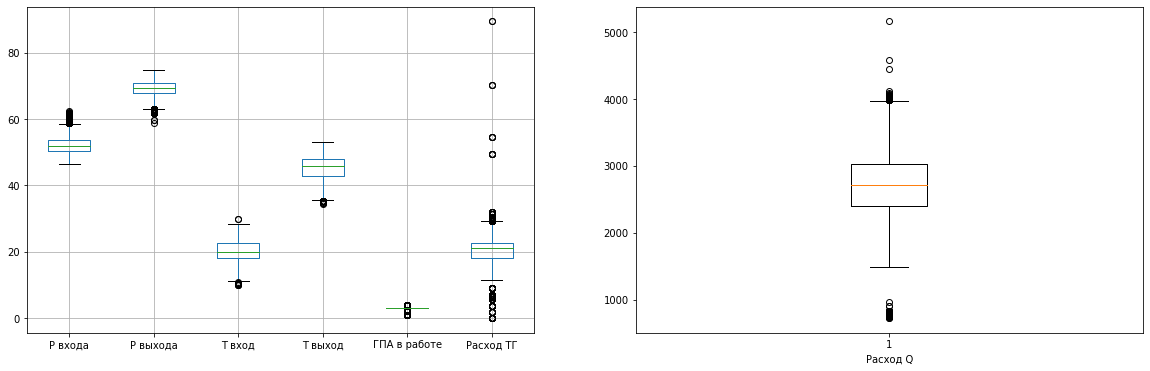

In [24]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
df[df.columns[2:]].boxplot()
plt.subplot(1, 2, 2)
plt.boxplot(df['Расход Q'])
plt.xlabel('Расход Q')

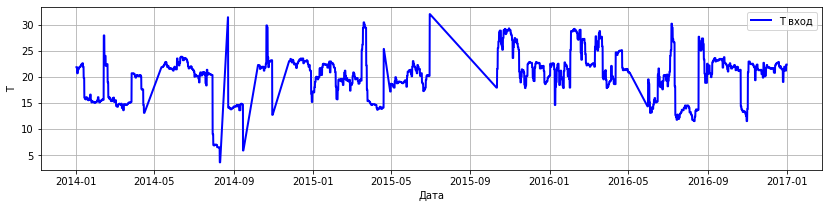

In [63]:
plt.figure(figsize=[14,3])

plt.plot(df['Дата'], df['Расход ТГ'], 'b', linewidth=2,label='T вход' ) 

plt.xlabel('Дата')
plt.ylabel('Т')
plt.legend()
plt.grid() 

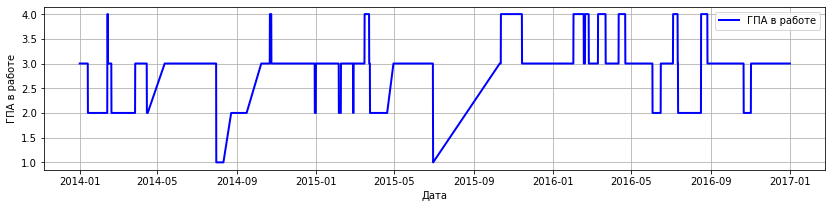

In [64]:
plt.figure(figsize=[14,3])

plt.plot(df['Дата'], df['ГПА в работе'], 'b', linewidth=2,label='ГПА в работе' ) 

plt.xlabel('Дата')
plt.ylabel('ГПА в работе')
plt.legend()
plt.grid() 

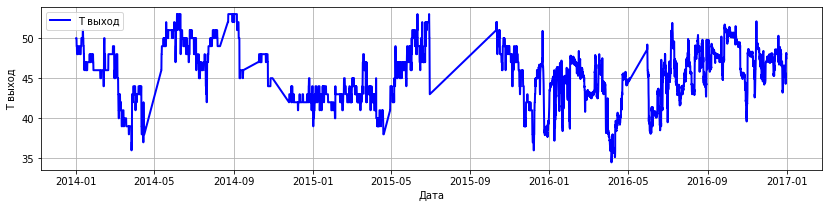

In [65]:
plt.figure(figsize=[14,3])

plt.plot(df['Дата'], df['Т выход'], 'b', linewidth=2,label='Т выход' ) 

plt.xlabel('Дата')
plt.ylabel('Т выход')

plt.legend()
plt.grid()

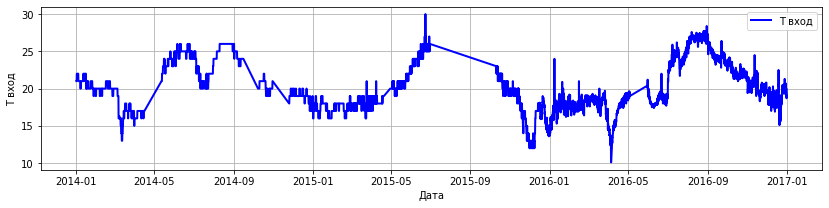

In [66]:
plt.figure(figsize=[14,3])

plt.plot(df['Дата'], df['Т вход'], 'b', linewidth=2,label='Т вход' ) 

plt.xlabel('Дата')
plt.ylabel('Т вход')

plt.legend()
plt.grid()

На построенных графиках видно, что существенное кол-во выбросов есть в параметрах  и "Расход ТГ". 
Также в параметре "Расход Q" есть несколько выбросов, которые существено отличаются по значению от остальных значений в квантиле. Эти значениния (выбросы) необходимо удалить для построения более точной модели.
Параметр ГПА в работе необходимо на ограничение >0

Удаляем  выбросы в Расход Q

In [53]:
df=df.drop(index=[1873,8292,8837])

In [ ]:
df

Смотрим на график Расхода ТГ

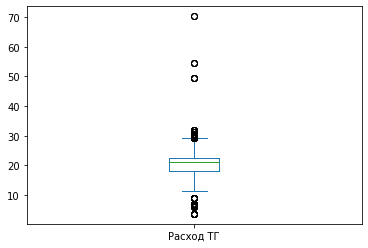

In [54]:
df=df.reset_index(drop=True)
df2=df['Расход ТГ']
df2.columns=['T']
_, bp = df2.T.plot.box(return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]

Удаляем выбросы Расхода ТГ

In [56]:
df=df[(df['Расход ТГ'] > 0)]
df=df.drop(index=[2908,2909,2910,2633,2634,2635,2636,7872	,7873,7874,7875,7876])

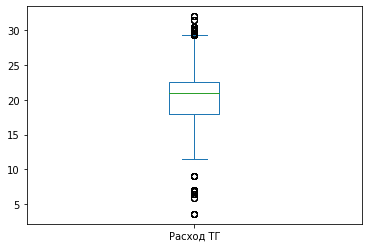

In [57]:
df=df.reset_index(drop=True)
df1=df['Расход ТГ']
df1.columns=['T']
_, bp = df1.T.plot.box(return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]


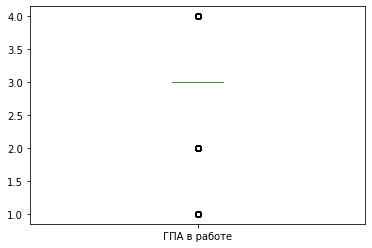

In [29]:
df1=df['ГПА в работе']
df1.columns=['T']
_, bp = df1.T.plot.box(return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]

'ГПА в работе с 0' не пересекается, поэтому мы ничего не делаем с этим параметром 

Text(0.5, 0, 'Расход Q')

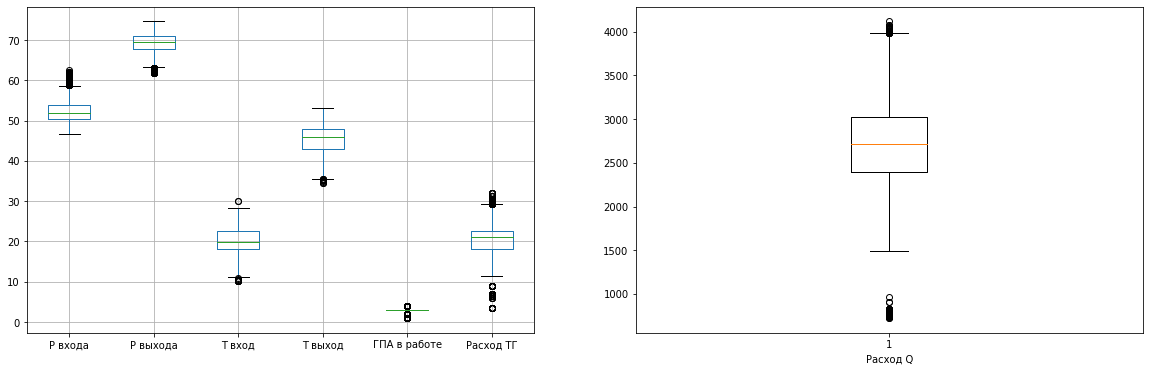

In [59]:
# Итоговые  графики "ящик с усами" 
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
df[df.columns[2:]].boxplot()
plt.subplot(1, 2, 2)
plt.boxplot(df['Расход Q'])
plt.xlabel('Расход Q')

#Этап построения регрессионной модели

Необходимо выполнить проверку на мультиколлинеарность независимых переменных. Необходимо рассчитать коэффициент детерминации, произвести анализ вклада независимых переменных в отклик модели и исключить те переменные, которые не вносят существенного вклада

Оценка точности модели  с помощью коэффициента детерминации:

In [97]:
X = df.drop(['Дата', 'Расход ТГ'], axis=1)
y = df['Расход ТГ']
model = LinearRegression()
model.fit(X, y)   
print('Коэффициент детерминации: {0}'.format(model.score(X, y)))

Коэффициент детерминации: 0.858801611841633


Построение тепловой карты для понимания корреляции:

              Расход Q   Р входа  Р выхода    Т вход   Т выход  ГПА в работе
Расход Q      1.000000  0.207062  0.293029 -0.048309 -0.032798      0.775891
Р входа       0.207062  1.000000  0.593869  0.226915 -0.277532     -0.110971
Р выхода      0.293029  0.593869  1.000000  0.123876  0.219651      0.234418
Т вход       -0.048309  0.226915  0.123876  1.000000  0.692763     -0.161342
Т выход      -0.032798 -0.277532  0.219651  0.692763  1.000000      0.078711
ГПА в работе  0.775891 -0.110971  0.234418 -0.161342  0.078711      1.000000


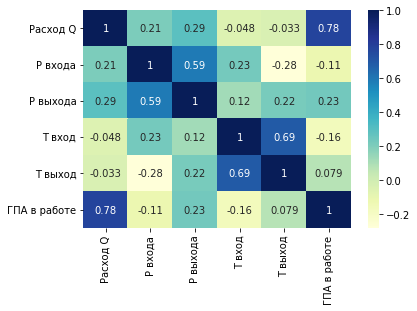

In [75]:
import matplotlib.pyplot as plt  
import pandas as pd  
import seaborn as sns  
    
# importing the data  

print(X.corr())  
    
# plotting the correlation heatmap  
df_plot = sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)  
    
# displaying the heatmap  
plt.show()

Видим, что T выхода и T входа зависят друг от друга, т.к. коэффициент корреляции стремится к 1. Если между двумя независимыми переменными набора данных существует сильная корреляция, это приводит к мультиколлинеарности. В таком случае мы удаляем один из параметров и смотрим, как ведет себя система с удалением одного из параметров и удалением выбросов в Т выход:

In [99]:
X = df.drop(['Дата', 'Расход ТГ','Т вход'], axis=1)
y = df['Расход ТГ']
model = LinearRegression()
model.fit(X, y)   
print('Коэффициент детерминации: {0}'.format(model.score(X, y)))

Коэффициент детерминации: 0.8455701370537879


Коэффициент детерминации практически не падает, изменения оставляем.

#Этап анализа точности модели

Для проверки поведения модели, необходимо построить график зависимости расхода топливного газа или электроэнергии (в соответствии с вариантом) от расхода транспортируемого газа. Остальные параметры модели должны быть заданы в соответствии с табл.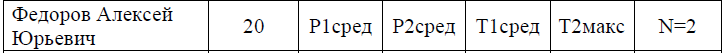

Создаем новый массив данных df3, где будут храниться все значения для построения графика 

In [100]:
df3=df['Расход Q']
df3=pd.DataFrame(df3)
df3['Р входа']=df['Р входа'].mean()
df3['Р выхода']=df['Р выхода'].mean()
df3['Т выход']=max(df['Т выход'])
df3['ГПА в работе']=2
df3

,Расход Q,Р входа,Р выхода,Т выход,ГПА в работе
0,2800.1,52.289639,69.2912,53.0,2
1,2800.2,52.289639,69.2912,53.0,2
2,2794.5,52.289639,69.2912,53.0,2
3,2807.7,52.289639,69.2912,53.0,2
4,2815.7,52.289639,69.2912,53.0,2
...,...,...,...,...,...
10438,3190.5,52.289639,69.2912,53.0,2
10439,3220.4,52.289639,69.2912,53.0,2
10440,3164.1,52.289639,69.2912,53.0,2
10441,3179.4,52.289639,69.2912,53.0,2


In [101]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10443 entries, 0 to 10442
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Расход Q      10443 non-null  float64
 1   Р входа       10443 non-null  float64
 2   Р выхода      10443 non-null  float64
 3   Т выход       10443 non-null  float64
 4   ГПА в работе  10443 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 408.1 KB


In [102]:
x=df3['Расход Q'];
ym = model.predict(df3);

Text(0, 0.5, 'Расход топливного газа (ТГ) на перекачку (тыс.м3/2 часа)')

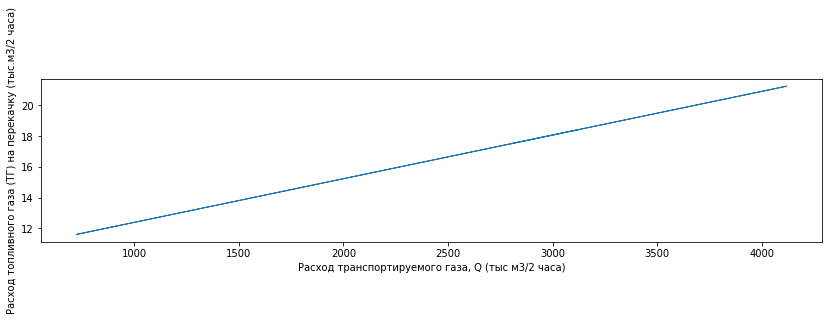

In [103]:
plt.figure(figsize=[14,3])
plt.plot(x, ym, linewidth=1) 
plt.xlabel('Расход транспортируемого газа, Q (тыс м3/2 часа)') 
plt.ylabel('Расход топливного газа (ТГ) на перекачку (тыс.м3/2 часа)')

#Вывод

В ходе построения регрессионной модели, обеспечивающей расчет затрат на перекачку газа компрессионным цехом, была разработана модель с точностью 84,6%, что является высоким показателем.

In [104]:
print('Коэффициент детерминации: {0}'.format(model.score(X, y)))

Коэффициент детерминации: 0.8455701370537879


Была проведена **предварительная обработка данных**: испорт данных их файлов Excel, удаление лишних строк и столбцов, которые не используются для анализа параметров.
На этапе **анализа данных** было произведено построение диаграммы "ящик с усами" для анализа и удаления выбросов, а также исключение периодов, когда компрессионный цех не работал.
На этапе построения регриссионной модели произвели проверку на мультиколлениарность, удалили зависимые переменные и избавились от выбросов, которые не вносили существенно вклада в модель. Расчитали коэффициент детерминации.
В завершении работы проверили точность модели с помощью графика, в котором построили зависисмость расхода топливного газа от расхода транспортируемого газа.
